# Analysis of interesting municipalities

## Importing libraries and appending paths

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import plotly.graph_objects as go

In [22]:
sys.path.append('..')

## Importing serotype data

In [23]:
file_s = '../Data/dengue_BR_serotypes.csv'
s_data = pd.read_csv(file_s, delimiter = ';')
s_data = s_data.drop(columns = ['Unnamed: 0', 'SG_UF_NOT'])

# Simultaneous analysis of municipalities

## Selecting municipalities of interests
- Regions that have a lot of cases, and perform a lot of tests for serotypes a year. All of them perform at least a few a years, there are very few municipalities who do this, most have skipped some years of testing for serotypes. In this case, SP is one that has done this, but due to its high volume of tests and cases/tests in most of the years I have included it.

In [24]:
municipalities = [355030, 330455, 520870, 530010, 230440, 310620, 354340, 354980]
names = ['SP','RJ','Goiania','DF','Fortaleza','Belo Horizonte', 'Rib. Preto', 'SJ do Rio Preto']

In [25]:
s_data = s_data[s_data['ID_MUNICIP'].isin(municipalities)]

## Padding data for processing

In [26]:
years = s_data['YEAR'].unique()
muns = s_data['ID_MUNICIP'].unique()
serotypes = s_data['SOROTIPO'].unique()

In [27]:
years_df = []
muns_df = []
serotypes_df = []
cases_df = []

In [28]:
for year in years:
    for mun in muns:
        for serotype in serotypes:
            years_df.append(year)
            muns_df.append(mun)
            serotypes_df.append(serotype)
            filt_tmp = ((s_data['ID_MUNICIP'] == mun) & (s_data['YEAR'] == year) & (s_data['SOROTIPO'] == serotype))
            s_tmp = s_data[filt_tmp]
            if(s_tmp.empty):
                cases_df.append(0)
            else:
                cases_df.append(s_tmp.iloc[0]['NUMBER'])

In [29]:
df_total = pd.DataFrame(list(zip(years_df, muns_df, serotypes_df, cases_df)),
                   columns =['YEAR', 'ID_MUNICIP', 'SEROTYPE', 'CASES'])

## Cases in each municipality in each year, time series plots

In [30]:
df_cases = df_total.groupby(['YEAR','ID_MUNICIP'])['CASES'].sum()
df_cases = df_cases.to_frame(name = 'CASES').reset_index()

In [32]:
df_cases['ID_MUNICIP'] = df_cases['ID_MUNICIP'].astype(str)
muns = df_cases['ID_MUNICIP'].unique()

In [33]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(muns)).as_hex())

fig = go.Figure()
for d,p in zip(muns, pal):
    fig.add_trace(go.Scatter(x = df_cases[df_cases['ID_MUNICIP']==d]['YEAR'],
                             y = df_cases[df_cases['ID_MUNICIP']==d]['CASES'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

## Tests in each municipality in each year, time series plots

In [38]:
# total tests per state per year
df_res = df_total.copy()
filt_res = (df_res['SEROTYPE'] != ' ')
df_res = df_res[filt_res]
df_res = df_res.groupby(['YEAR','ID_MUNICIP'])['CASES'].sum()
df_res = df_res.to_frame(name = 'TESTS').reset_index()
df_tmp = df_total.copy()
df_tmp = df_tmp.groupby(['YEAR','ID_MUNICIP'])['CASES'].sum()
df_tmp = df_tmp.to_frame(name = 'CASES').reset_index()
df_res['CASES'] = df_tmp['CASES']

In [41]:
df_res['ID_MUNICIP'] = df_res['ID_MUNICIP'].astype(str)

In [42]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(muns)).as_hex())

fig = go.Figure()
for d,p in zip(muns, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['ID_MUNICIP']==d]['YEAR'],
                             y = df_res[df_res['ID_MUNICIP']==d]['TESTS'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

# Individual municipality analysis

## Municipality 1: Sao Paulo - serotypes

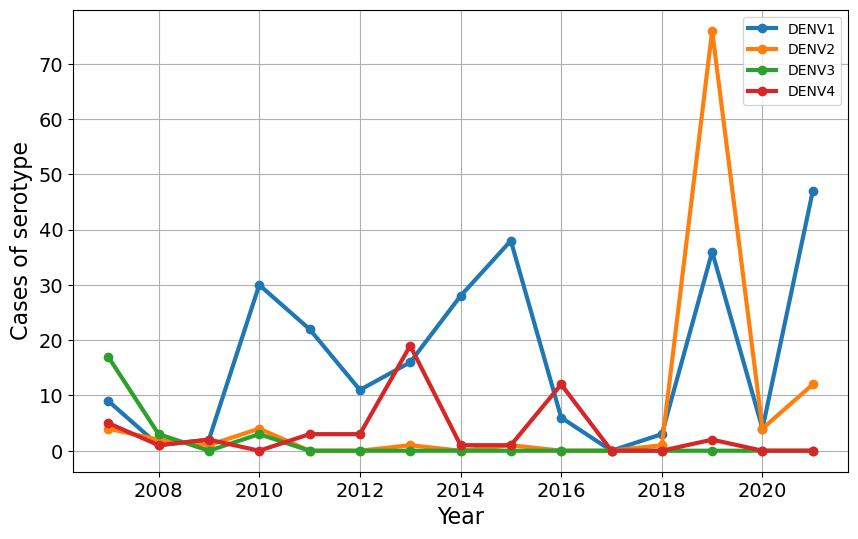

In [48]:
df_sp = df_total[df_total['ID_MUNICIP'] == 355030]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 2: Rio de Janeiro - serotypes

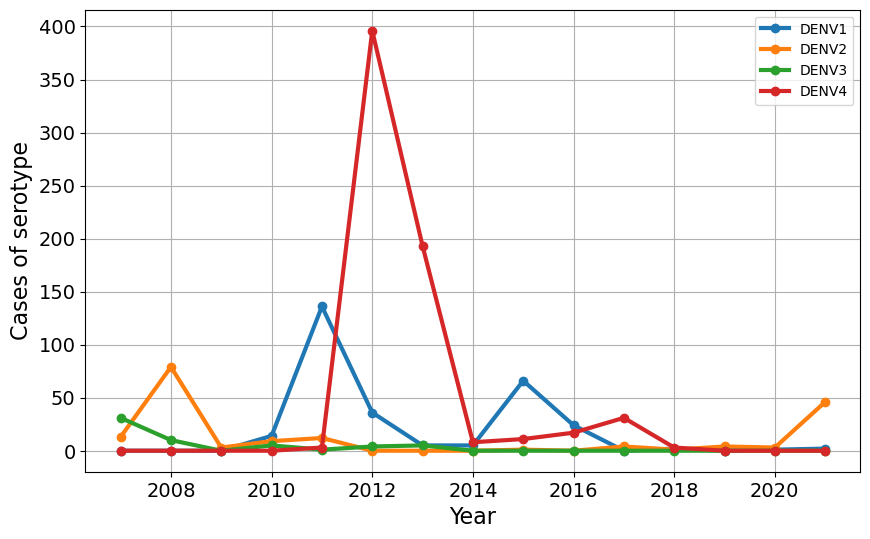

In [49]:
df_sp = df_total[df_total['ID_MUNICIP'] == 330455]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 3: Goiania - serotypes

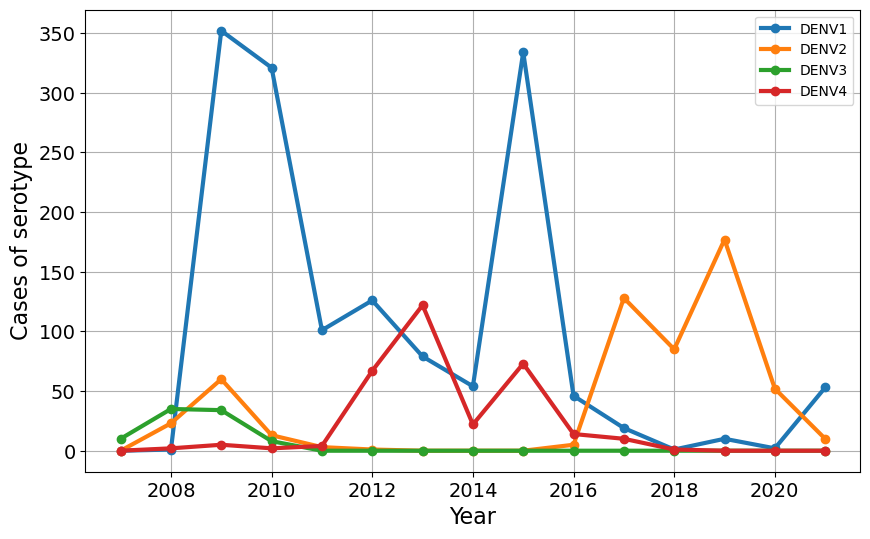

In [50]:
df_sp = df_total[df_total['ID_MUNICIP'] == 520870]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 4: Brasilia, DF - serotypes

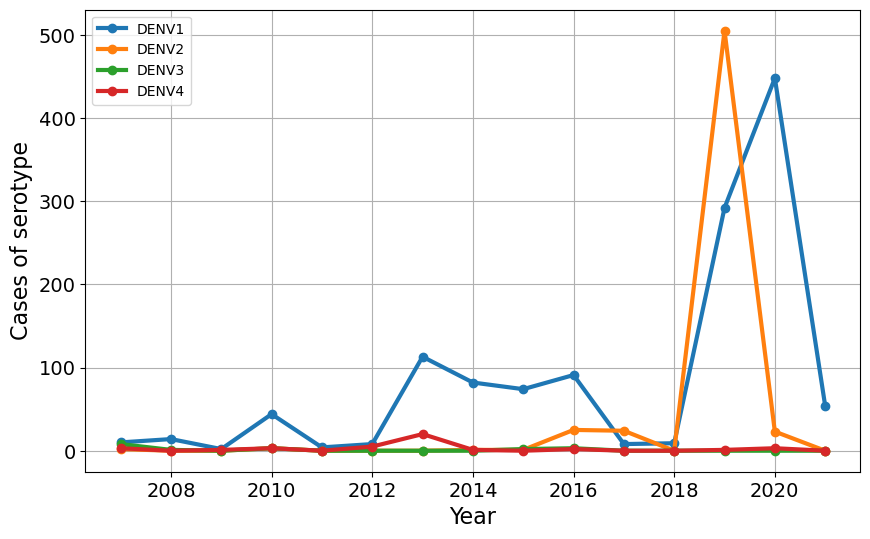

In [51]:
df_sp = df_total[df_total['ID_MUNICIP'] == 530010]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 5: Fortaleza, CE - serotypes

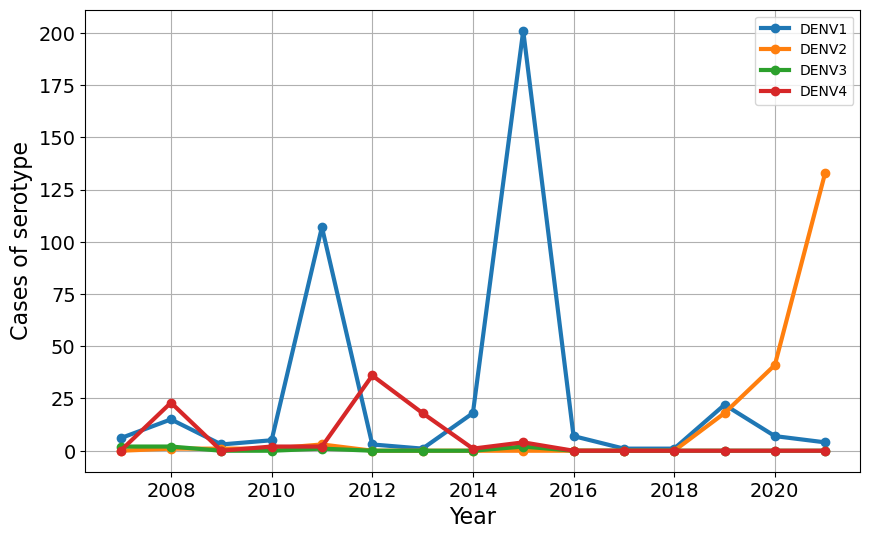

In [54]:
df_sp = df_total[df_total['ID_MUNICIP'] == 230440]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 7: Belo Horizonte, MG - serotypes

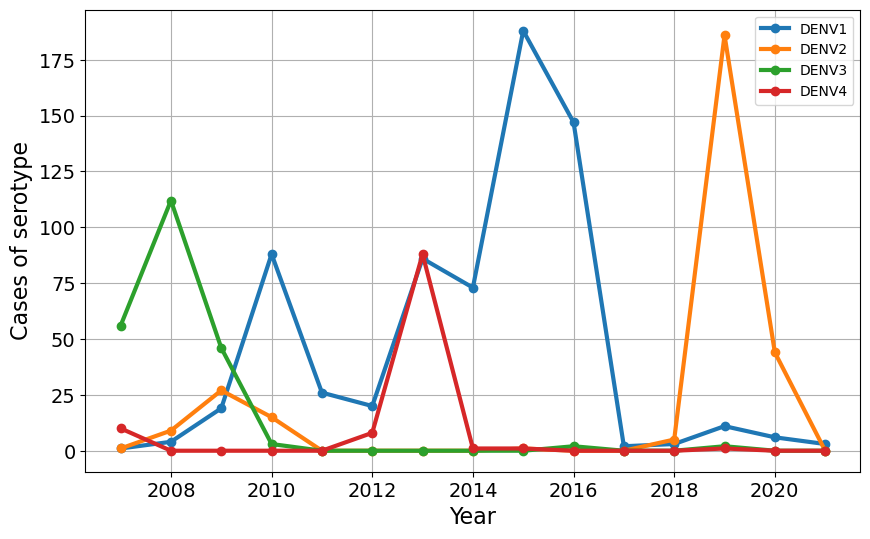

In [55]:
df_sp = df_total[df_total['ID_MUNICIP'] == 310620]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 8: Riberao Preto, SP - serotypes

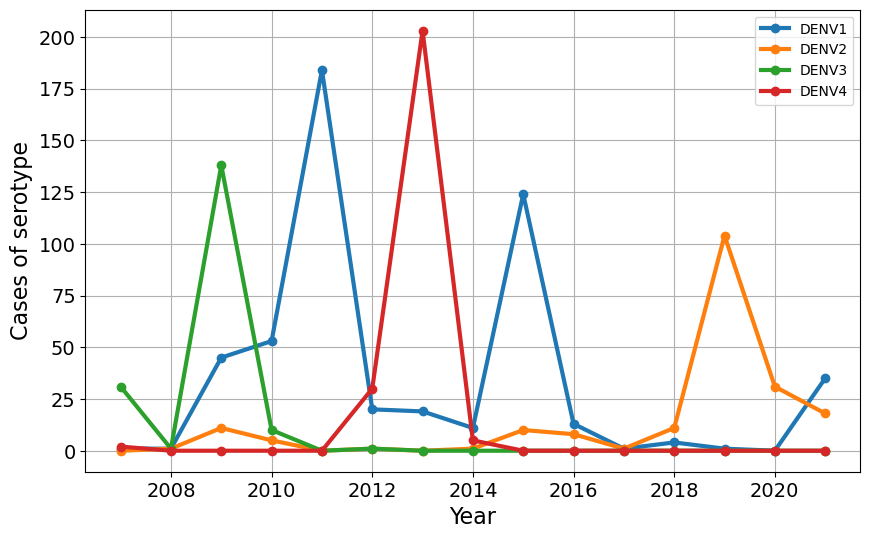

In [56]:
df_sp = df_total[df_total['ID_MUNICIP'] == 354340]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

## Municipality 9: Sao José do Rio Preto - serotypes

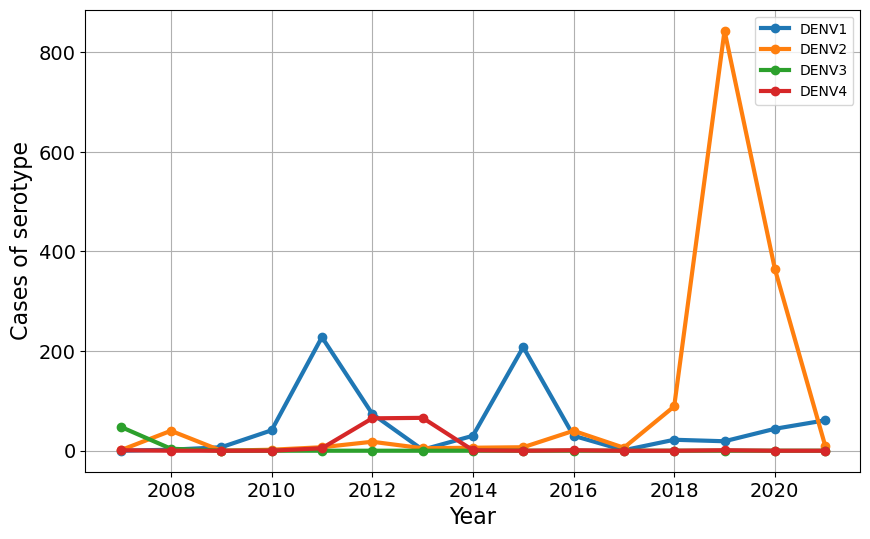

In [57]:
df_sp = df_total[df_total['ID_MUNICIP'] == 354980]
df_sp = df_sp.drop(columns = ['ID_MUNICIP'])
fig = plt.figure(figsize = (10,6))
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(df_sp['YEAR'].unique(),df_sp[df_sp['SEROTYPE']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()